<h1>Accessing <a href="http://www.uniprot.org/">UniProt</a> Web Services from BioServices</h1>

<p>This notebook illustrates some of the uniprot web services using BioServices uniprot module. We show how to </p>
<ul>
<li>Search for a known entry </li>
<li>Search for a key word given an organism </li>
<li>Retrieve i a dataframe information related to a list of known entries </li>
<li>Perform a mapping between databases</li>
<li>Fetch a FASTA sequence</li>
</ul>



In [1]:
from bioservices import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


### UniProt service can help us getting  information about a given protein

In [2]:
u = UniProt()

If you already know the entry name, just type it:

In [3]:
res = u.search("ZAP70_HUMAN")
print(res)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P43403	ZAP70_HUMAN	reviewed	Tyrosine-protein kinase ZAP-70 (EC 2.7.10.2) (70 kDa zeta-chain associated protein) (Syk-related tyrosine kinase)	ZAP70 SRK	Homo sapiens (Human)	619



Otherwise, let us search the entire database. We can restrict the search to human species, and print results limited to 3 best matches and sub-selection of columns/information

In [4]:
print(u.search('zap70+AND+organism:9606', frmt='tab', limit=3,
               columns="entry name, length, genes"))

Entry name	Length	Gene names
ZAP70_HUMAN	619	ZAP70 SRK
CBL_HUMAN	906	CBL CBL2 RNF55
LCK_HUMAN	509	LCK



In [5]:
print(res)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P43403	ZAP70_HUMAN	reviewed	Tyrosine-protein kinase ZAP-70 (EC 2.7.10.2) (70 kDa zeta-chain associated protein) (Syk-related tyrosine kinase)	ZAP70 SRK	Homo sapiens (Human)	619



#### Experimental: using pandas to scan the output of the search function

In [6]:
u.debugLevel = "INFO"
u.timeout = 10   # some queries are long and requires much more time; default is 1000 seconds


Accession via entry name (e.g., ZAP70_HUMAN) is faster than by Entry (e.g., P43403)

In [7]:
df = u.get_df(["ZAP70_HUMAN", "GRAB_HUMAN", "JUN_HUMAN", "MK15_HUMAN"])
df

,Entry,Entry name,Gene names,Gene names (primary ),Gene names (synonym ),Gene names (ordered locus ),Gene names (ORF ),Organism,Organism ID,Protein names,...,Taxonomic lineage IDs (GENUS),Taxonomic lineage IDs (SUBGENUS),Taxonomic lineage IDs (SPECIES GROUP),Taxonomic lineage IDs (SPECIES SUBGROUP),Taxonomic lineage IDs (SPECIES),Taxonomic lineage IDs (SUBSPECIES),Taxonomic lineage IDs (VARIETAS),Taxonomic lineage IDs (FORMA),Cross-reference (db_abbrev),Cross-reference (EMBL)
0,P43403,ZAP70_HUMAN,[ZAP70 SRK],ZAP70,SRK,NaN,NaN,Homo sapiens (Human),9606,Tyrosine-protein kinase ZAP-70 (EC 2.7.10.2) (...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB083211;AC016699;BC039039;BC053878;
1,Q8TD08,MK15_HUMAN,[MAPK15 ERK7 ERK8],MAPK15,ERK7 ERK8,NaN,NaN,Homo sapiens (Human),9606,Mitogen-activated protein kinase 15 (MAP kinas...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AY065978;AY994058;BC028034;
2,P10144,GRAB_HUMAN,[GZMB CGL1 CSPB CTLA1 GRB],GZMB,CGL1 CSPB CTLA1 GRB,NaN,NaN,Homo sapiens (Human),9606,Granzyme B (EC 3.4.21.79) (C11) (CTLA-1) (Cath...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M17016;J03189;J04071;J03072;M38193;M28879;BC03...
3,P05412,JUN_HUMAN,[JUN],JUN,NaN,NaN,NaN,Homo sapiens (Human),9606,Transcription factor AP-1 (Activator protein 1...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J04111;CR541724;BT019759;AY217548;BC006175;BC0...


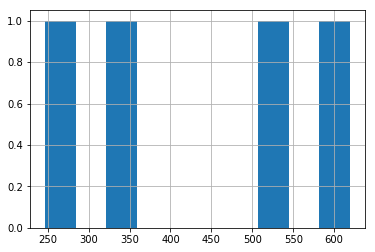

In [8]:
df['Length'].hist()


### UniProt service can help us getting the FASTA sequence and more generally information about a given protein

In [9]:
sequence = u.retrieve("P43403", "fasta")

In [10]:
print(sequence)

>sp|P43403|ZAP70_HUMAN Tyrosine-protein kinase ZAP-70 OS=Homo sapiens OX=9606 GN=ZAP70 PE=1 SV=1
MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGYVLSLVHDVRFHHFP
IERQLNGTYAIAGGKAHCGPAELCEFYSRDPDGLPCNLRKPCNRPSGLEPQPGVFDCLRD
AMVRDYVRQTWKLEGEALEQAIISQAPQVEKLIATTAHERMPWYHSSLTREEAERKLYSG
AQTDGKFLLRPRKEQGTYALSLIYGKTVYHYLISQDKAGKYCIPEGTKFDTLWQLVEYLK
LKADGLIYCLKEACPNSSASNASGAAAPTLPAHPSTLTHPQRRIDTLNSDGYTPEPARIT
SPDKPRPMPMDTSVYESPYSDPEELKDKKLFLKRDNLLIADIELGCGNFGSVRQGVYRMR
KKQIDVAIKVLKQGTEKADTEEMMREAQIMHQLDNPYIVRLIGVCQAEALMLVMEMAGGG
PLHKFLVGKREEIPVSNVAELLHQVSMGMKYLEEKNFVHRDLAARNVLLVNRHYAKISDF
GLSKALGADDSYYTARSAGKWPLKWYAPECINFRKFSSRSDVWSYGVTMWEALSYGQKPY
KKMKGPEVMAFIEQGKRMECPPECPPELYALMSDCWIYKWEDRPDFLTVEQRMRACYYSL
ASKVEGPPGSTQKAEAACA



Alternatively, you can just use the following function to get the fasta sequence:

In [11]:
u.get_fasta_sequence("P43403")

'MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGYVLSLVHDVRFHHFPIERQLNGTYAIAGGKAHCGPAELCEFYSRDPDGLPCNLRKPCNRPSGLEPQPGVFDCLRDAMVRDYVRQTWKLEGEALEQAIISQAPQVEKLIATTAHERMPWYHSSLTREEAERKLYSGAQTDGKFLLRPRKEQGTYALSLIYGKTVYHYLISQDKAGKYCIPEGTKFDTLWQLVEYLKLKADGLIYCLKEACPNSSASNASGAAAPTLPAHPSTLTHPQRRIDTLNSDGYTPEPARITSPDKPRPMPMDTSVYESPYSDPEELKDKKLFLKRDNLLIADIELGCGNFGSVRQGVYRMRKKQIDVAIKVLKQGTEKADTEEMMREAQIMHQLDNPYIVRLIGVCQAEALMLVMEMAGGGPLHKFLVGKREEIPVSNVAELLHQVSMGMKYLEEKNFVHRDLAARNVLLVNRHYAKISDFGLSKALGADDSYYTARSAGKWPLKWYAPECINFRKFSSRSDVWSYGVTMWEALSYGQKPYKKMKGPEVMAFIEQGKRMECPPECPPELYALMSDCWIYKWEDRPDFLTVEQRMRACYYSLASKVEGPPGSTQKAEAACA'

### UniProt service has also a mapping utility that can be called via BioServices

The are 3 parameters required. The input database code, the output database code and query as a list of valid identifiers

In [12]:
u.mapping("ACC", "KEGG_ID", 'P43403')

defaultdict(list, {'P43403': ['hsa:7535']})

In [13]:
u.mapping("ID", "PDB_ID", "P43403")

defaultdict(list,
            {'P43403': ['1FBV',
              '1M61',
              '1U59',
              '2CBL',
              '2OQ1',
              '2OZO',
              '2Y1N',
              '3ZNI',
              '4A4B',
              '4A4C',
              '4K2R',
              '4XZ0',
              '4XZ1',
              '5O76']})

Here are the databases available for mapping

In [14]:
u._mapping

{'AGD': 'AGD_ID',
 'Aarhus/Ghent-2DPAGE': 'AARHUS_GHENT_2DPAGE_ID',
 'Allergome': 'ALLERGOME_ID',
 'ArachnoServer': 'ARACHNOSERVER_ID',
 'BioCyc': 'BIOCYC_ID',
 'CGD': 'CGD',
 'CYGD': 'CYGD_ID',
 'ChEMBL': 'CHEMBL_ID',
 'ChiTaRS': 'CHITARS_ID',
 'CleanEx': 'CLEANEX_ID',
 'ConoServer': 'CONOSERVER_ID',
 'DIP': 'DIP_ID',
 'DMDM': 'DMDM_ID',
 'DNASU': 'DNASU_ID',
 'DisProt': 'DISPROT_ID',
 'DrugBank': 'DRUGBANK_ID',
 'EMBL/GenBank/DDBJ': 'EMBL_ID',
 'EMBL/GenBank/DDBJ CDS': 'EMBL',
 'EchoBASE': 'ECHOBASE_ID',
 'EcoGene': 'ECOGENE_ID',
 'Ensembl': 'ENSEMBL_ID',
 'Ensembl Genomes': 'ENSEMBLGENOME_ID',
 'Ensembl Genomes Protein': 'ENSEMBLGENOME_PRO_ID',
 'Ensembl Genomes Transcript': 'ENSEMBLGENOME_TRS_ID',
 'Ensembl Protein': 'ENSEMBL_PRO_ID',
 'Ensembl Transcript': 'ENSEMBL_TRS_ID',
 'Entrez Gene (GeneID)': 'P_ENTREZGENEID',
 'EuPathDB': 'EUPATHDB_ID',
 'FlyBase': 'FLYBASE_ID',
 'GI number*': 'P_GI',
 'GeneCards': 'GENECARDS_ID',
 'GeneFarm': 'GENEFARM_ID',
 'GeneID': 'P_ENTREZGENEID',
 'G

# Using get_df method to get exhaustive information

In [16]:
! wget ftp://ftp.ebi.ac.uk/pub/databases/uniprot/knowledgebase/uniprot_sprot.fasta.gz

--2020-03-10 18:05:59--  ftp://ftp.ebi.ac.uk/pub/databases/uniprot/knowledgebase/uniprot_sprot.fasta.gz
           => ‘uniprot_sprot.fasta.gz’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/uniprot/knowledgebase ... done.
==> SIZE uniprot_sprot.fasta.gz ... 89133570
==> PASV ... done.    ==> RETR uniprot_sprot.fasta.gz ... done.
Length: 89133570 (85M) (unauthoritative)

uniprot_sprot.fasta 100%[===================>]  85.00M  4.58MB/s    in 19s     

2020-03-10 18:06:18 (4.41 MB/s) - ‘uniprot_sprot.fasta.gz’ saved [89133570]



In [17]:
!gunzip -c uniprot_sprot.fasta.gz | grep sp - | grep HUMAN | awk '{print substr($1, 12, length($1))}' > list.txt


In [15]:
with open("list.txt", "r") as fh:
    identifiers = fh.read().split("\n")

In [20]:
# This is slow. You may want to increase the attribute TIMEOUT or call this 
# command several times and aggregate the results
u.TIMEOUT = 300
####### limit set to 1 is important, otherwise this will take forever
u.logging.level = "INFO"
df = u.get_df(identifiers[0:1000], limit=1)

INFO    [bioservices:UniProt]:  fetching information from uniprot for 1000 entries
INFO    [bioservices:UniProt]:  uniprot.get_df 1/10
INFO    [bioservices:UniProt]:  uniprot.get_df 2/10
INFO    [bioservices:UniProt]:  uniprot.get_df 3/10
INFO    [bioservices:UniProt]:  uniprot.get_df 4/10
INFO    [bioservices:UniProt]:  uniprot.get_df 5/10
INFO    [bioservices:UniProt]:  uniprot.get_df 6/10
INFO    [bioservices:UniProt]:  uniprot.get_df 7/10
INFO    [bioservices:UniProt]:  uniprot.get_df 8/10
INFO    [bioservices:UniProt]:  uniprot.get_df 9/10
INFO    [bioservices:UniProt]:  uniprot.get_df 10/10


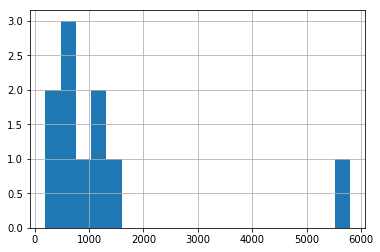

In [21]:
df.Length.hist(bins=20)

<hr>
For more information, please see <a href="http://pythonhosted.org//bioservices/references.html?bioservices.uniprot.UniProt#module-bioservices.uniprot">bioservices.uniprot module documentation.</a>